# Visualización con Matplotlib y Seaborn

* Matplotlib: descripción, métodos, instalación y sintaxis básica.

* Seaborn: descripción, métodos, instalación y sintaxis básica. Graf más atractivos y complejos, trabaja muy bien con DF.

* Documentación.

* Construcción de principales gráficos: histogramas, diagramas de caja, gráficos de barras (o columnas), gráficos de dispersión y mapa de calor.


In [1]:
#Buenas practicas importamor al cominezo para trabajar con el CSV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#pip install matplotlib


SyntaxError: invalid syntax (3509705854.py, line 2)

In [ ]:
import matplotlib.pyplot as plt

* ## Gráfico con Matplotlib

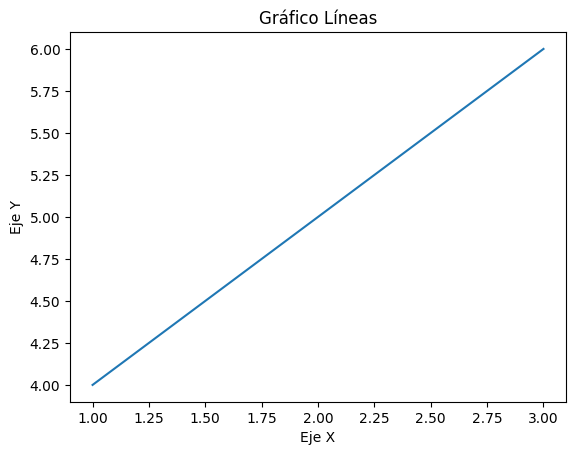

In [2]:
#Grafico coordenadas x e y / plt.metodo_grafico()
plt.plot([1, 2, 3], [4, 5, 6])
#Etiqueta al eje X
plt.xlabel('Eje X')
#Etiqueta al eje Y
plt.ylabel('Eje Y')
#Título
plt.title('Gráfico Líneas')
plt.show() # o ; quita resumen texto sobre graf

* ## Gráfico con Seaborn

In [27]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [28]:
import seaborn as sns

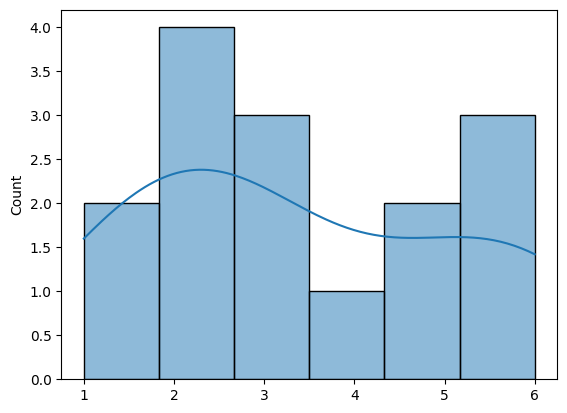

In [3]:
sns.histplot(data=[1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 5, 5, 6, 6, 6], kde=True, bins=6)
plt.show()

* ## Ventajas y desventajas gráficos, Matplotlib y Seaborn

-- Matplotlib documentación-> https://matplotlib.org/stable/index.html

-- Seaborn documentación -> https://seaborn.pydata.org/examples/index.html

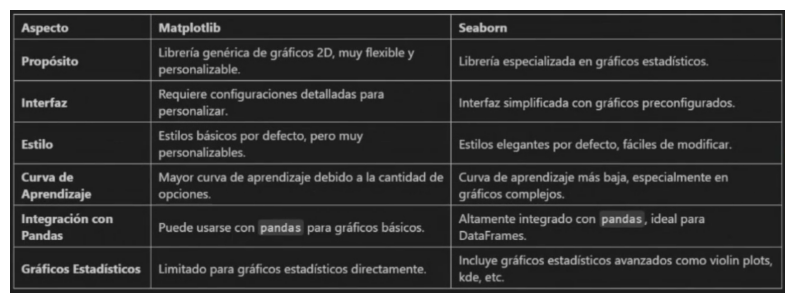

In [4]:
# Abrir y mostrar imagen en Jupyter 

import matplotlib.image as mpimg

img = mpimg.imread('Data/Cap.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()


-----
### Trabajando con graficos en CVS ventas

(imports al comienzo)

In [5]:
df = pd.read_csv('Data/online_sales_2020-2022.csv', index_col=0)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433


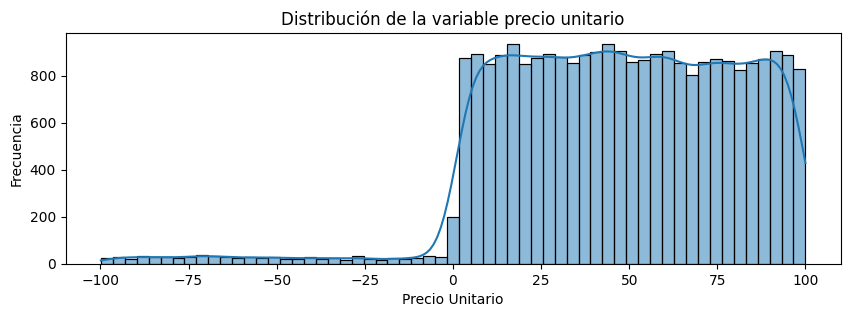

In [6]:
plt.figure(figsize=(10, 3))
sns.histplot(df['UnitPrice'], kde=True)
plt.xlabel('Precio Unitario')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable precio unitario')
plt.show()

In [7]:
asimetria = df['UnitPrice'].skew()
kurtosis = df['UnitPrice'].kurtosis()

print(asimetria)
print(kurtosis)

-0.7615592239021051
1.4442612879160714


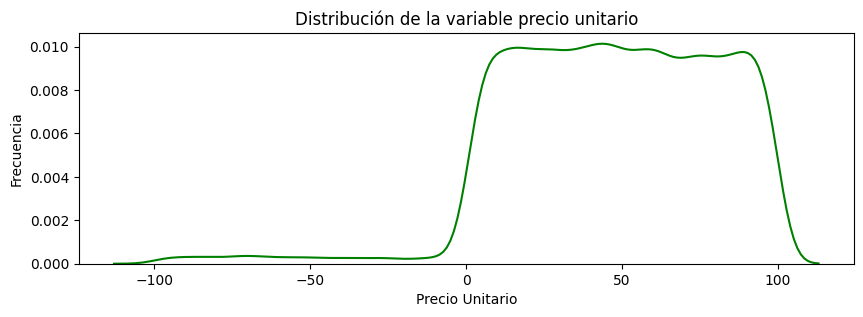

In [9]:
plt.figure(figsize=(10, 3))
sns.kdeplot(df['UnitPrice'], color='green')
plt.xlabel('Precio Unitario')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable precio unitario');


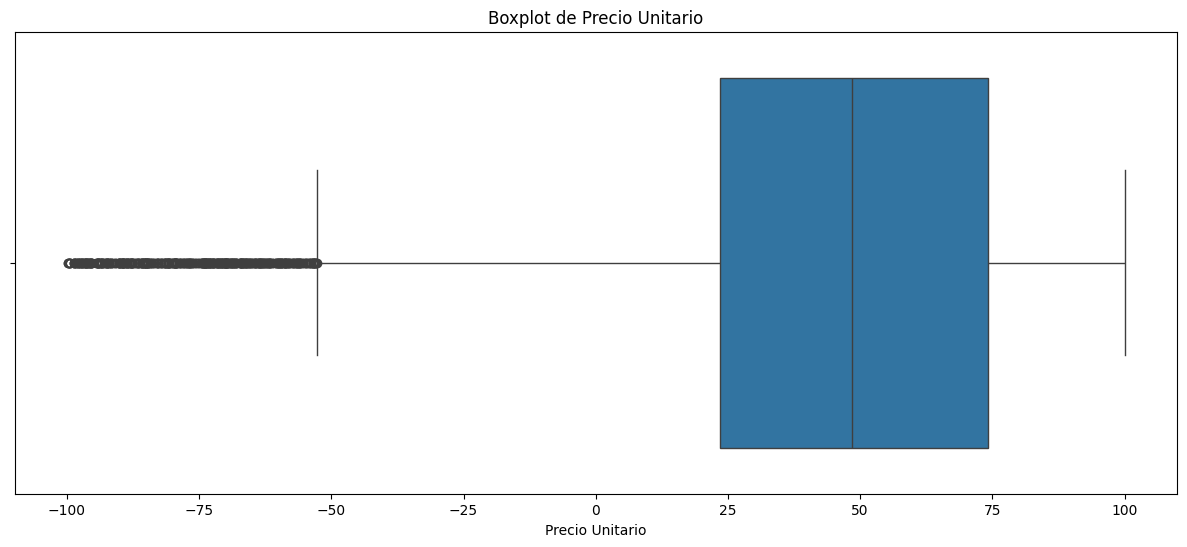

In [14]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='UnitPrice')
plt.xlabel('Precio Unitario')
plt.title('Boxplot de Precio Unitario');

In [15]:
df['UnitPrice'].describe().T

count    26304.000000
mean        47.256332
std         33.307590
min        -99.860000
25%         23.430000
50%         48.370000
75%         74.200000
max         99.990000
Name: UnitPrice, dtype: float64

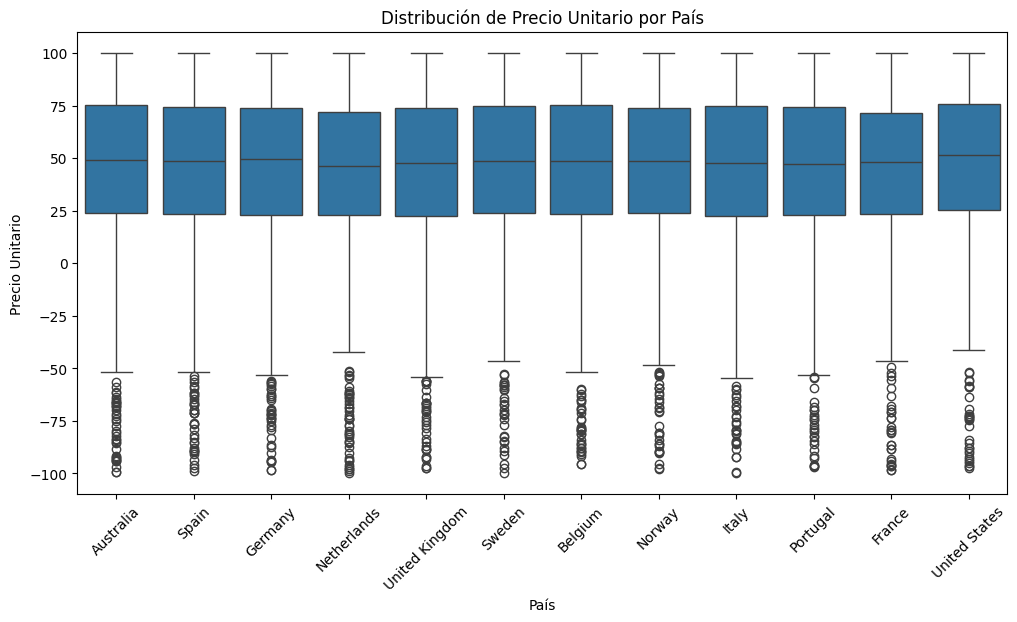

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='UnitPrice', x='Country')
plt.xticks(rotation=45)
plt.ylabel('Precio Unitario')
plt.xlabel('País')
plt.title('Distribución de Precio Unitario por País');

In [19]:
ventas_por_pais = df.groupby('Country')['Quantity'].sum()

In [20]:
ventas_por_pais

Country
Australia         47995
Belgium           48071
France            51107
Germany           49795
Italy             49428
Netherlands       49511
Norway            47847
Portugal          50458
Spain             48704
Sweden            49802
United Kingdom    50214
United States     49994
Name: Quantity, dtype: int64

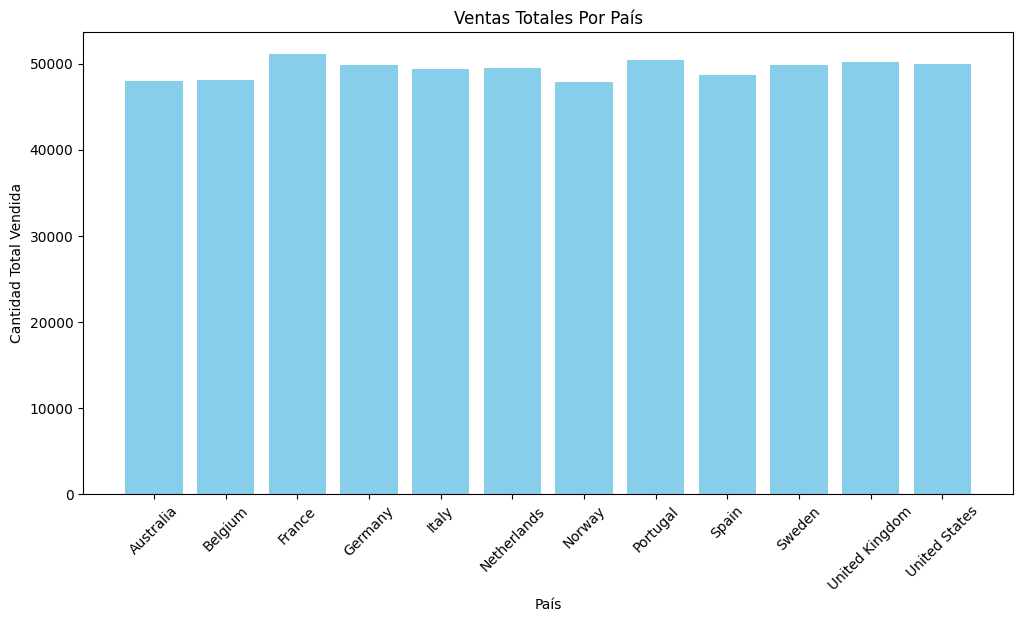

In [23]:
plt.figure(figsize=(12, 6))
plt.bar(ventas_por_pais.index, ventas_por_pais.values, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('País')
plt.ylabel('Cantidad Total Vendida')
plt.title('Ventas Totales Por País')
plt.show()


In [24]:
grouped_data = df.groupby('Description')['Quantity'].sum().reset_index()
grouped_data

,Description,Quantity
0,Backpack,54576
1,Blue Pen,53668
2,Desk Lamp,53904
3,Headphones,52822
4,Notebook,51789
5,Office Chair,54109
6,T-shirt,52940
7,USB Cable,55304
8,Wall Clock,55064
9,White Mug,55471


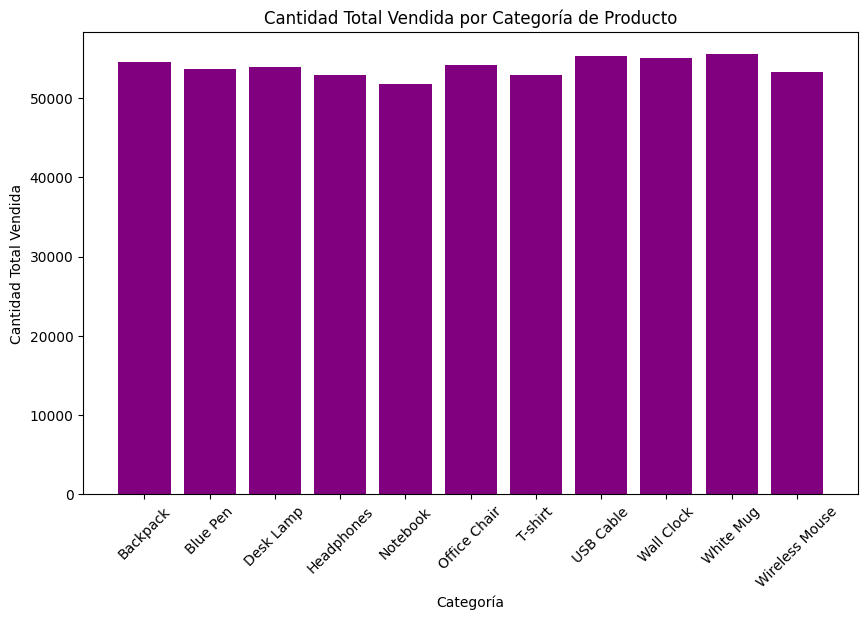

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Description'], grouped_data['Quantity'], color='purple')
plt.xlabel('Categoría')
plt.ylabel('Cantidad Total Vendida')
plt.title('Cantidad Total Vendida por Categoría de Producto')
plt.xticks(rotation=45)
plt.show()


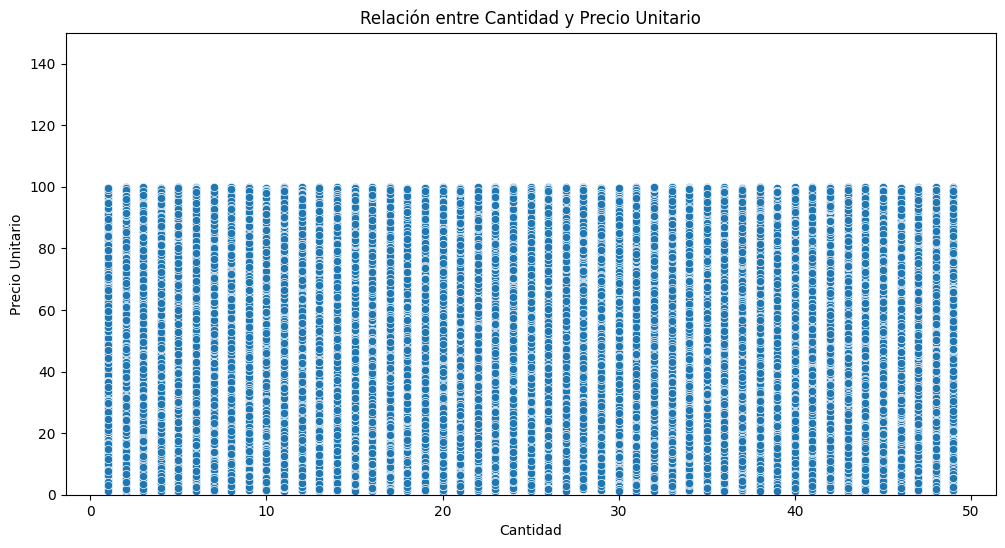

In [35]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=df[(df['UnitPrice'] > 0) & (df['Quantity'] > 0)]) #Quita valores negativos
plt.ylim(0, 150)
plt.xlabel('Cantidad')
plt.ylabel('Precio Unitario')
plt.title('Relación entre Cantidad y Precio Unitario')
plt.show()